In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

1.Reading the csv file

In [2]:
show_df = pd.read_csv('imdb_top_250_series_episode_ratings.csv')

In [3]:
show_df

,Unnamed: 0,Season,Episode,Rating,Code,Title
0,0,1,1,9.4,tt5491994,Planet Earth II
1,1,1,2,9.1,tt5491994,Planet Earth II
2,2,1,3,8.9,tt5491994,Planet Earth II
3,3,1,4,8.8,tt5491994,Planet Earth II
4,4,1,5,8.6,tt5491994,Planet Earth II
...,...,...,...,...,...,...
15113,176,6,23,8.2,tt0043208,I Love Lucy
15114,177,6,24,8.8,tt0043208,I Love Lucy
15115,178,6,25,8.4,tt0043208,I Love Lucy
15116,179,6,26,8.5,tt0043208,I Love Lucy


In [22]:
show_df.describe()

,Unnamed: 0,Season,Episode,Rating
count,15118.000000,15118.000000,15118.000000,15118.000000
mean,83.511840,4.719606,15.686268,8.065247
std,103.019199,5.079538,28.838423,0.768004
min,0.000000,1.000000,1.000000,2.200000
25%,18.000000,1.000000,4.000000,7.700000
50%,49.000000,3.000000,8.000000,8.100000
75%,113.000000,6.000000,16.000000,8.600000
max,726.000000,33.000000,291.000000,10.000000


In [23]:
show_df.shape

(15118, 6)

Check for the null or missing data.

In [21]:
len(show_df.notnull())

15118

It appears that dataset does not contain any null values

Let's check are there 250 unique shows just as the data says?

In [30]:
total_shows = len(show_df['Title'].unique())

In [31]:
total_shows

243

Apparantly there are 243 shows we will conduct our data analysis on these

Let's get the top rated episodes we will consider top rated episodes those have rating greater than 9.0 Rating.

In [40]:
top_rated = show_df['Rating'] > 9

In [41]:
show_df[top_rated]

,Unnamed: 0,Season,Episode,Rating,Code,Title
0,0,1,1,9.4,tt5491994,Planet Earth II
1,1,1,2,9.1,tt5491994,Planet Earth II
11,5,1,6,9.3,tt0903747,Breaking Bad
14,8,2,2,9.3,tt0903747,Breaking Bad
20,14,2,8,9.2,tt0903747,Breaking Bad
...,...,...,...,...,...,...
14967,30,1,31,9.5,tt0043208,I Love Lucy
14973,36,2,1,9.4,tt0043208,I Love Lucy
15050,113,4,16,9.5,tt0043208,I Love Lucy
15069,132,5,5,9.1,tt0043208,I Love Lucy


Now's let's look at the shows who has top rated episodes and how many 

In [42]:
show_df[top_rated]['Title'].unique()

array(['Planet Earth II', 'Breaking Bad', 'Band of Brothers', 'Chernobyl',
       'The Wire', 'Blue Planet II', 'Avatar: The Last Airbender',
       'Cosmos: A Spacetime Odyssey', 'The Sopranos', 'Our Planet',
       'Cosmos', 'Game of Thrones', 'Rick and Morty', 'The World at War',
       'Fullmetal Alchemist: Brotherhood', 'The Last Dance', 'Sherlock',
       'The Twilight Zone', 'Batman: The Animated Series',
       'Scam 1992: The Harshad Mehta Story', 'Arcane', 'Attack on Titan',
       'The Office', 'Firefly', 'Death Note', 'Only Fools and Horses',
       'True Detective', 'Hunter x Hunter', 'The Beatles: Get Back',
       'Seinfeld', 'Persona', 'Fargo', "Clarkson's Farm", 'Cowboy Bebop',
       'Better Call Saul', 'Nathan for You', 'Gravity Falls', 'Friends',
       'When They See Us', 'Last Week Tonight with John Oliver',
       'TVF Pitchers', "It's Always Sunny in Philadelphia", 'Das Boot',
       'Curb Your Enthusiasm', 'Fawlty Towers', 'The West Wing',
       'Freaks and Ge

In [43]:
shows_over9 = len(show_df[top_rated]['Title'].unique())

In [44]:
shows_over9

189

In [60]:
over9 = shows_over9 / total_shows * 100

In [47]:
1222 / 15118 * 100

8.083079772456674

Apparantly 77.77% shows have at least 1 or more episode which has a rating greater than 9.0. <br>
There 1222 episodes out of  15118 those have rating above 9.0 which is 8.08% of the total episodes.<br>
Let's Visualize this data in forms of Pie charts.

In [78]:
slices = [over9, 100 - over9]
labels = ['Shows above nine', 'Shows below nine']
colors = ['cyan', 'pink']
explode = [0, 0.08]

Text(0.5, 1.0, 'Shows which have at least one episode over Rating 9')

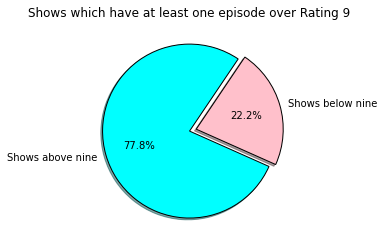

In [83]:
fig, ax = plt.subplots()
ax.pie(slices, labels = labels, explode = explode, autopct='%1.1f%%',colors = colors, wedgeprops = {'edgecolor' : 'black'}, shadow = True, startangle = 56)
plt.title('Shows which have at least one episode over Rating 9')